# Imports and Description

In [2]:
import pandas as pd

# Loading
file_path = 'insurance_claims.csv'
data = pd.read_csv(file_path)

# shape
data.shape


(1000, 40)

In [3]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [3]:
# describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


# EDA

In [4]:
#missing values
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [4]:
insurance_data = data.copy()
insurance_data_cleaned = insurance_data.drop(columns=['_c39', 'policy_number', 'insured_zip'])

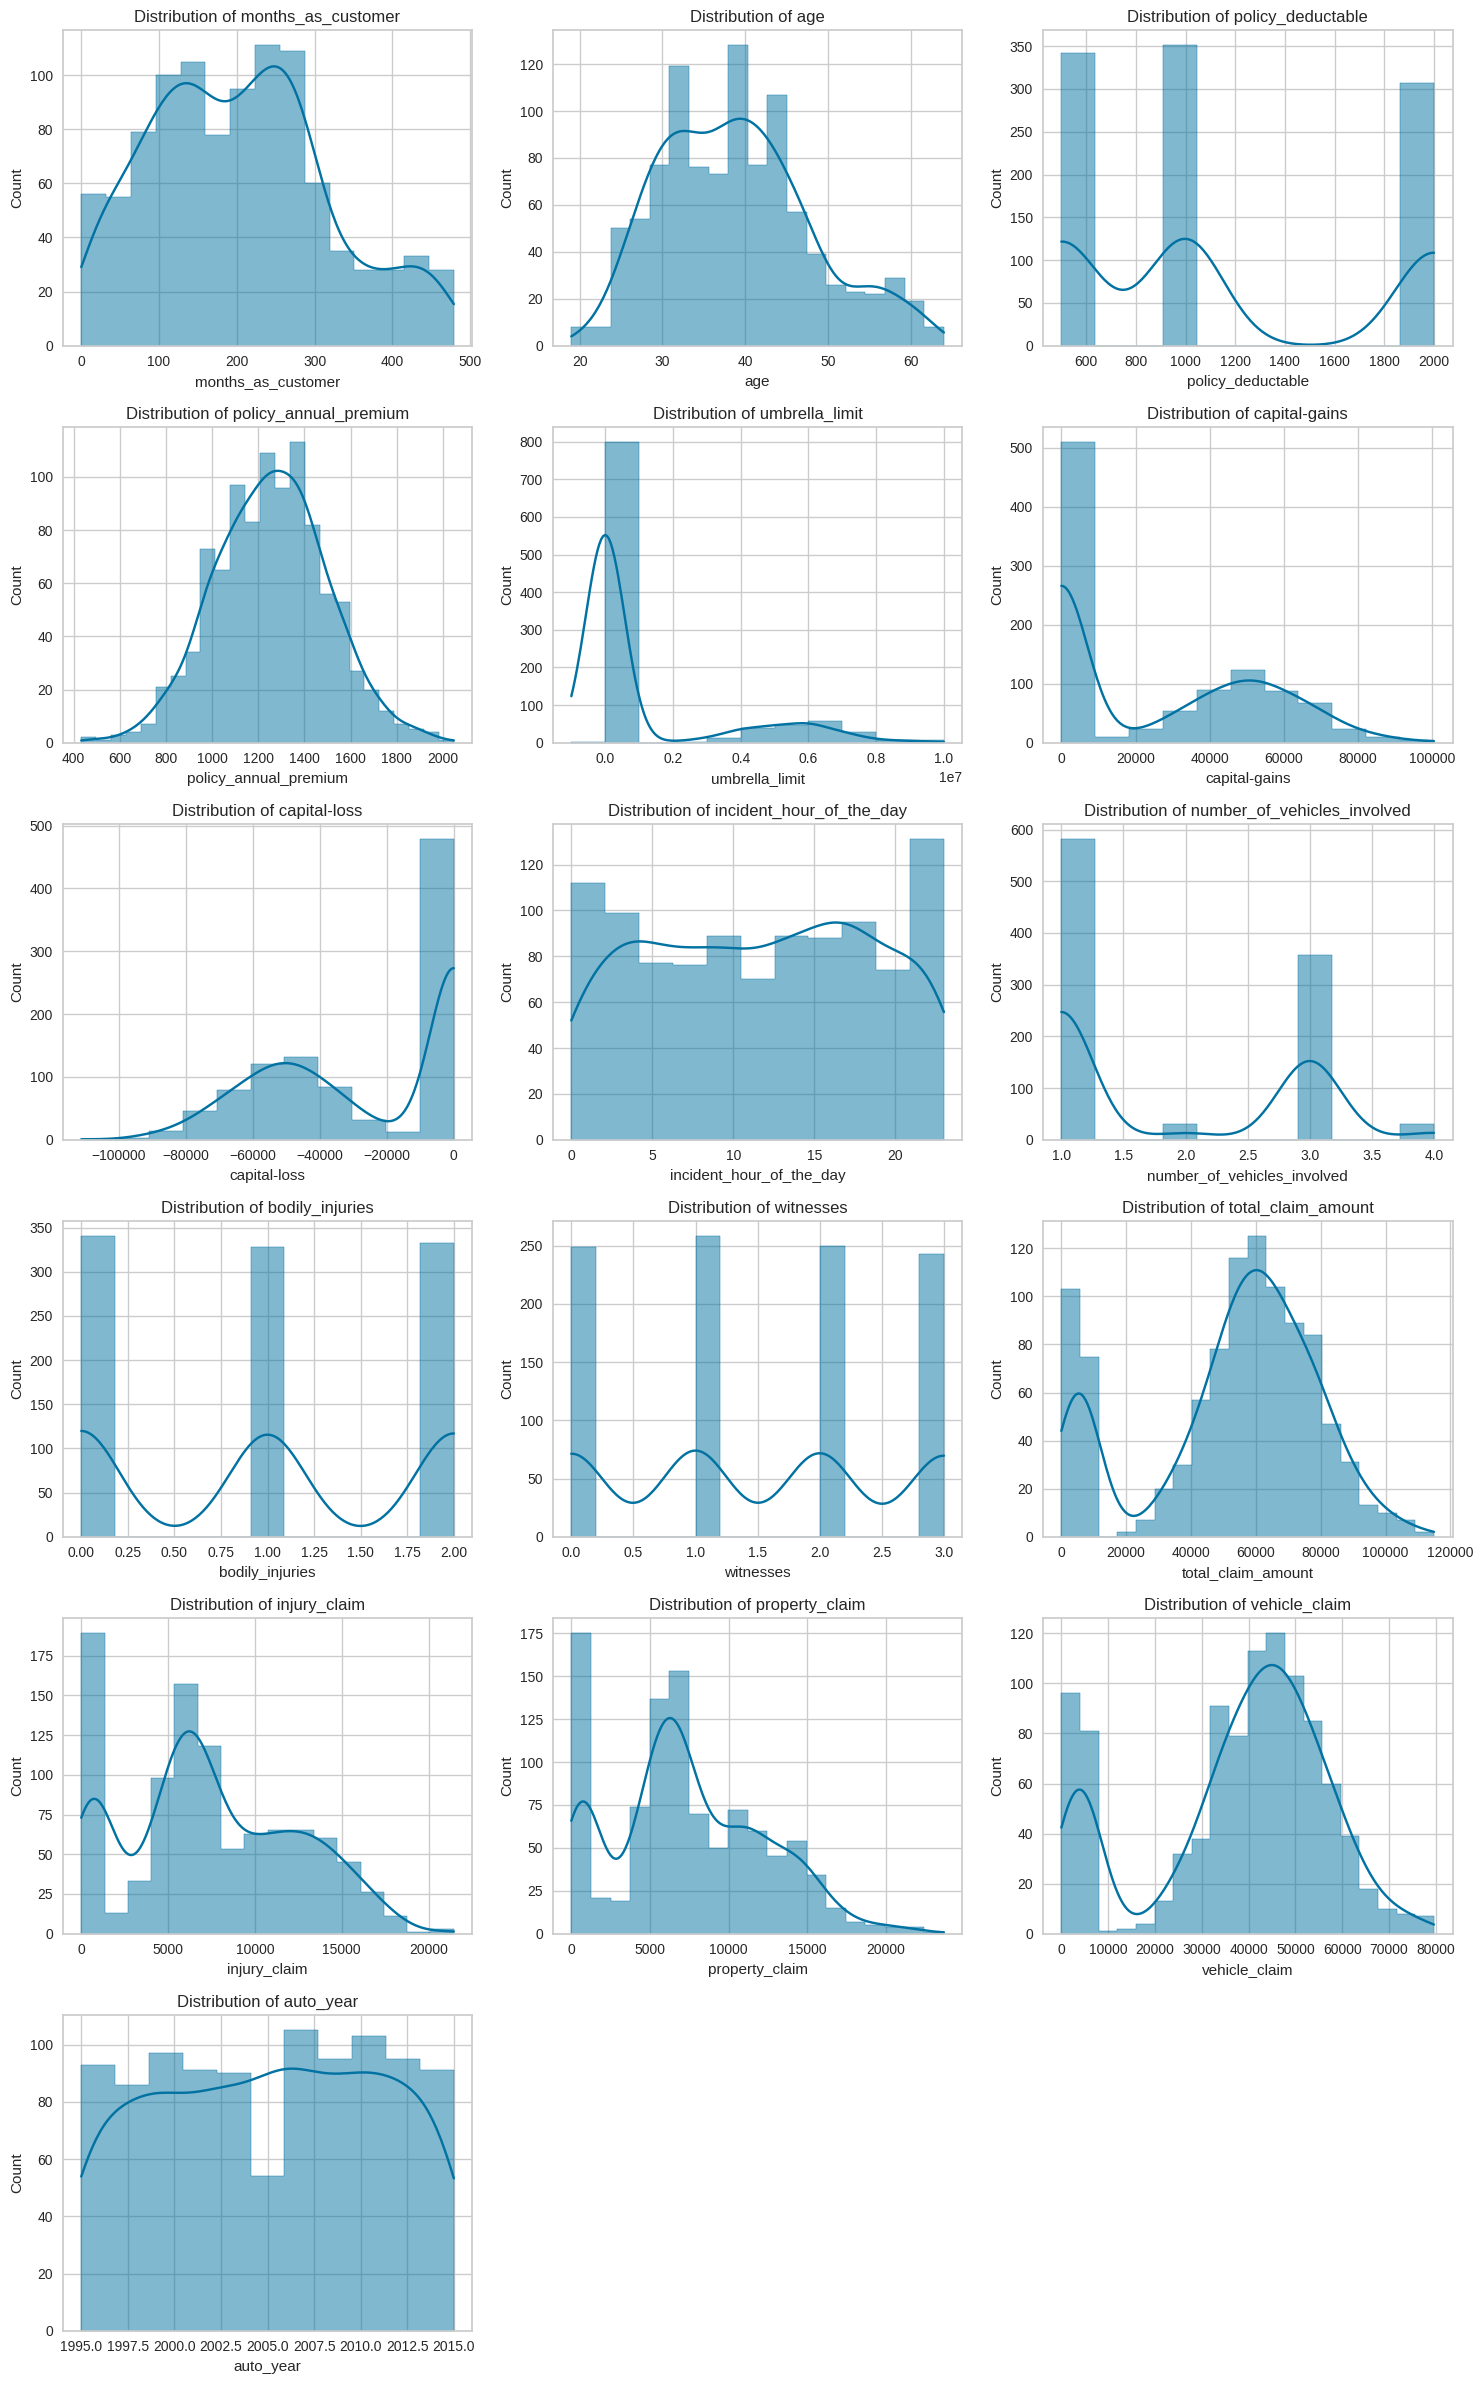

In [5]:
# Distribution of Variables(Numeric)

import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = insurance_data_cleaned.select_dtypes(include=['int64', 'float64']).columns

n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # ensures enough rows to display all plots

plt.figure(figsize=(15, n_rows * 4))

# Creating a histogram for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(insurance_data_cleaned[feature], kde=True, element='step')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


**Observations and Insights for Each Feature:**


* Months as Customer and Age: Both exhibit fairly normal distributions with slight right-skewness, indicating a larger number of relatively newer and younger customers.

* Policy Deductable, Policy Annual Premium, Umbrella Limit: These financial-related features are right-skewed, suggesting that higher values are less common but present.

* Capital Gains and Capital Losses: Both features show a high concentration of values at the lower end, with few high values, indicating most customers report low gains or losses.

* Incident Hour of the Day: This feature is fairly uniform with slight increases during certain hours, possibly related to typical commuting times.

* Number of Vehicles Involved, Bodily Injuries, Witnesses: These show distinct peaks at lower values with fewer instances as the number increases, typical of claim-related variables.

* Injury Claim, Property Claim, Vehicle Claim, Total Claim Amount: All are right-skewed, common in claim data where a large number of claims are small, but a few large claims can significantly impact the total.

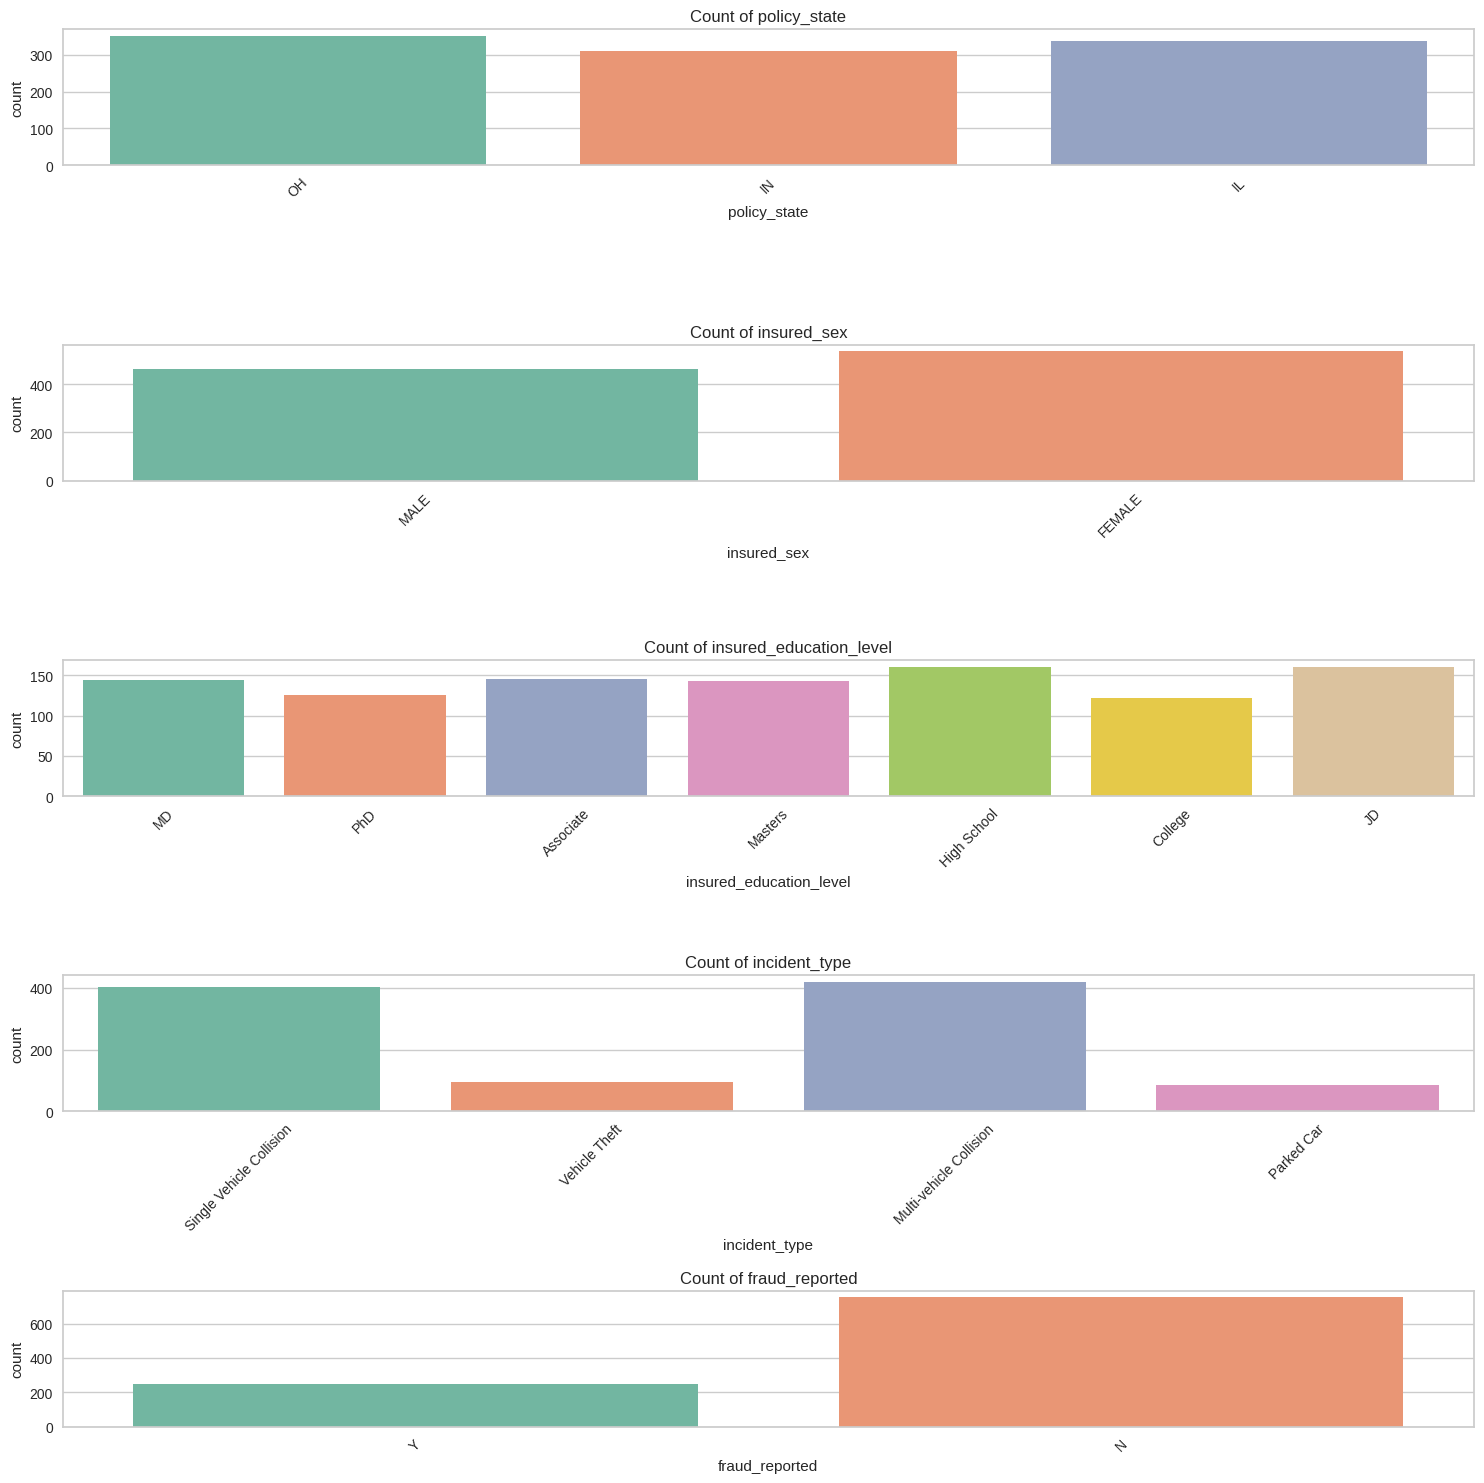

In [6]:
# categorical features for univariate analysis
categorical_features = ['policy_state', 'insured_sex', 'insured_education_level', 'incident_type', 'fraud_reported']

plt.figure(figsize=(15, len(categorical_features) * 3))

# Creating a count plot
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(data=insurance_data_cleaned, x=feature, palette='Set2')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Observations and Insights for Each Feature:**

* Policy State: Distribution shows a slight variance between states, with OH and IL having more policies compared to IN. This could influence claim patterns based on regional regulations or conditions.
* Insured Sex: The distribution between male and female is fairly balanced, indicating a good gender representation in the dataset.
* Insured Education Level: Most policyholders fall into the 'JD', 'High School', and 'Associate' categories, with fewer in 'Masters' and 'PhD'. This diversity in education levels might affect the types of claims made or their complexity.
* Incident Type: 'Multi-vehicle Collision' appears to be the most common, followed by 'Single Vehicle Collision'. This could be related to the severity and frequency of claims.
* Fraud Reported: A significant number of claims are not reported as fraud ('N'), with a smaller but substantial portion marked as fraudulent ('Y'). This indicates the necessity of a focused analysis on fraudulent cases to identify patterns or anomalies.

In [7]:
fraud_counts = data['fraud_reported'].value_counts()
fraud_counts

fraud_reported
N    753
Y    247
Name: count, dtype: int64

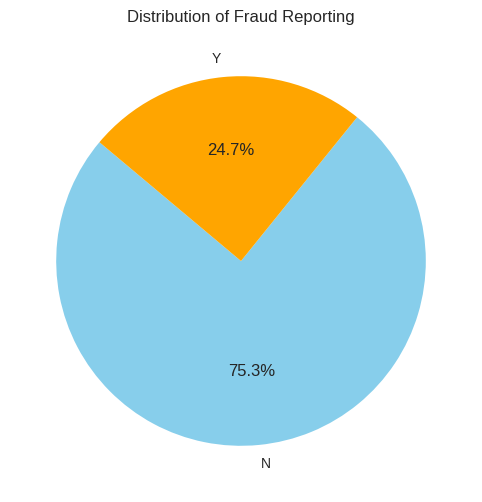

In [8]:
# pie chart
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Distribution of Fraud Reporting')
plt.show()

The Fraud Column is Skewed.

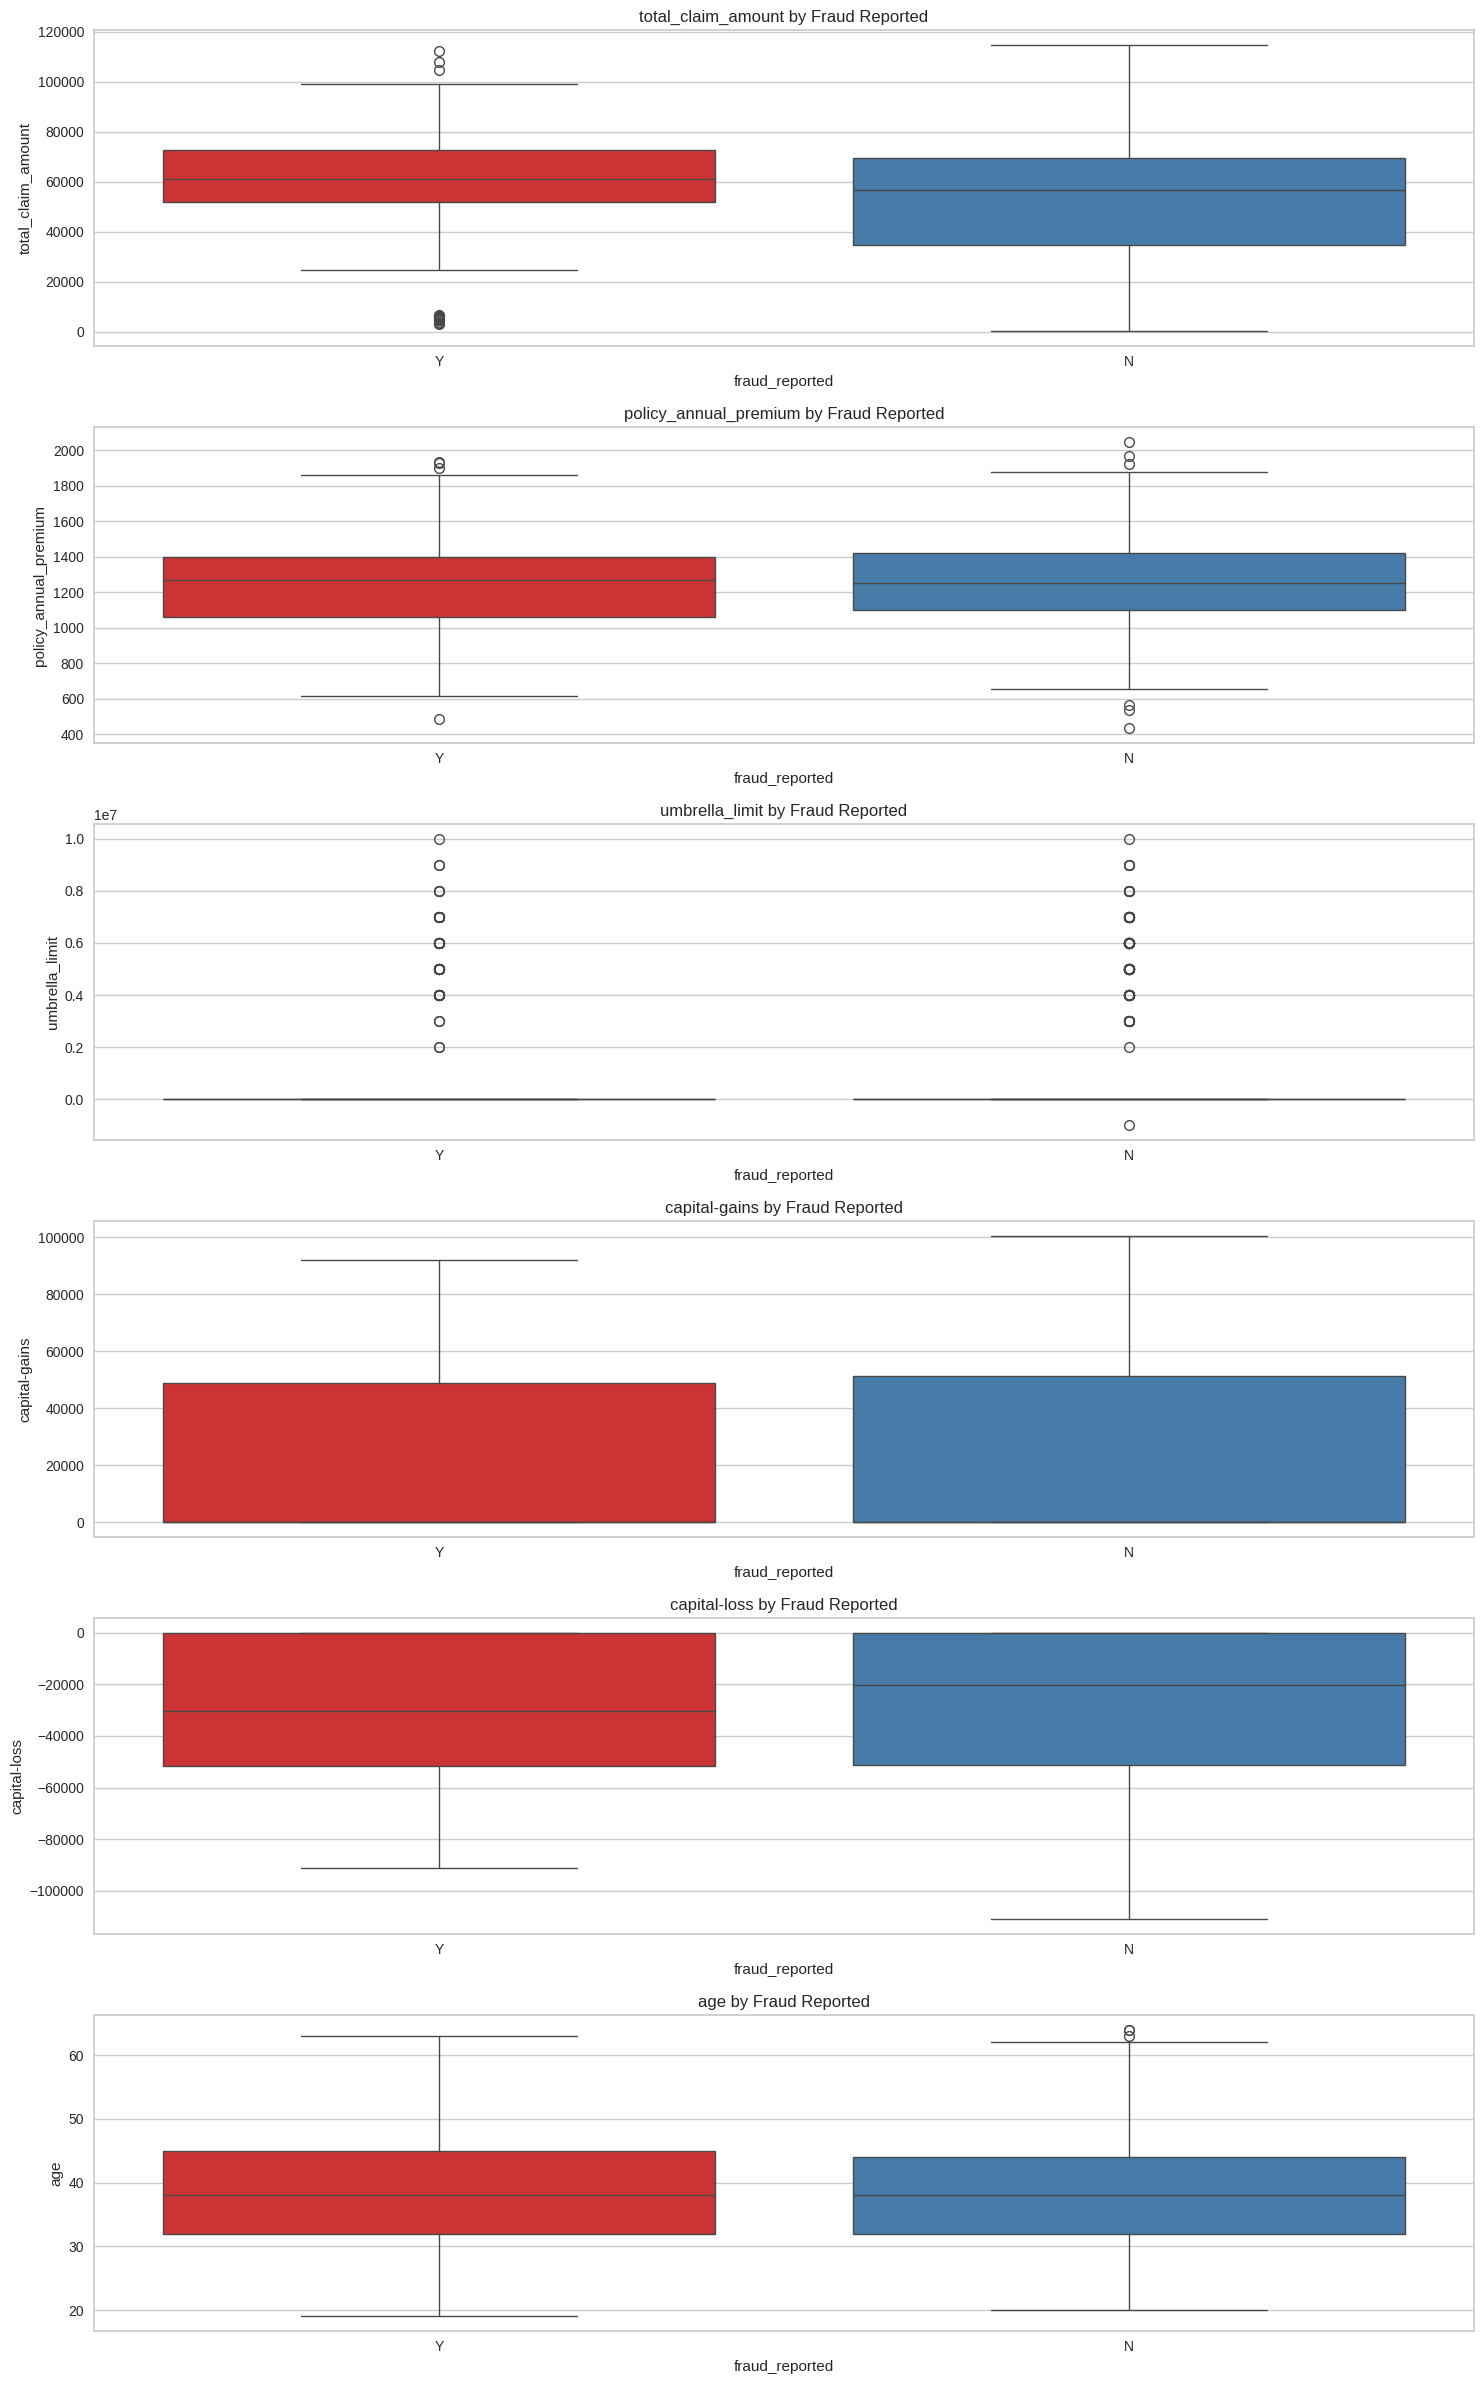

In [9]:
# BoxPlots of numerical features
numerical_features =  ['total_claim_amount', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'age']

insurance_data_cleaned.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, len(numerical_features) * 4))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x='fraud_reported', y=feature, data=insurance_data_cleaned, palette='Set1')
    plt.title(f'{feature} by Fraud Reported')

plt.tight_layout()
plt.show()


**Numeric Columns**

* Total Claim Amount:
Consistent with previous observations, fraud-reported claims tend to have a higher total claim amount, indicating a potential scrutiny or inclination towards fraud in higher value claims.
* Policy Annual Premium:
Again, no significant differences are observed between the distributions of premiums in fraud and non-fraud claims, suggesting that the premium amount might not be a direct indicator of fraudulent activity.
* Umbrella Limit:
Similar to earlier observations, claims with fraud reported have a slightly higher median in umbrella limits, potentially indicating that claims with higher coverage limits are more susceptible to fraud.
* Capital Gains:
No distinct differences in capital gains distributions between fraud and non-fraud claims, suggesting that this financial aspect does not significantly impact the likelihood of fraud.
* Capital Loss:
Like capital gains, capital losses show no clear trend or distinction that correlates with fraud reporting.
* Age:
The addition of age shows no stark differences in the median or distribution between fraudulent and non-fraudulent claims. This suggests that age, much like many other personal demographics, may not be a decisive factor in predicting fraud.

These findings emphasize that while certain financial aspects like the total claim amount and umbrella limits may have some correlation with fraud, personal demographics (such as age) and other financial metrics (like capital gains/losses and policy premiums) appear to have little to no direct association with fraudulent claims.

Categorical Columns

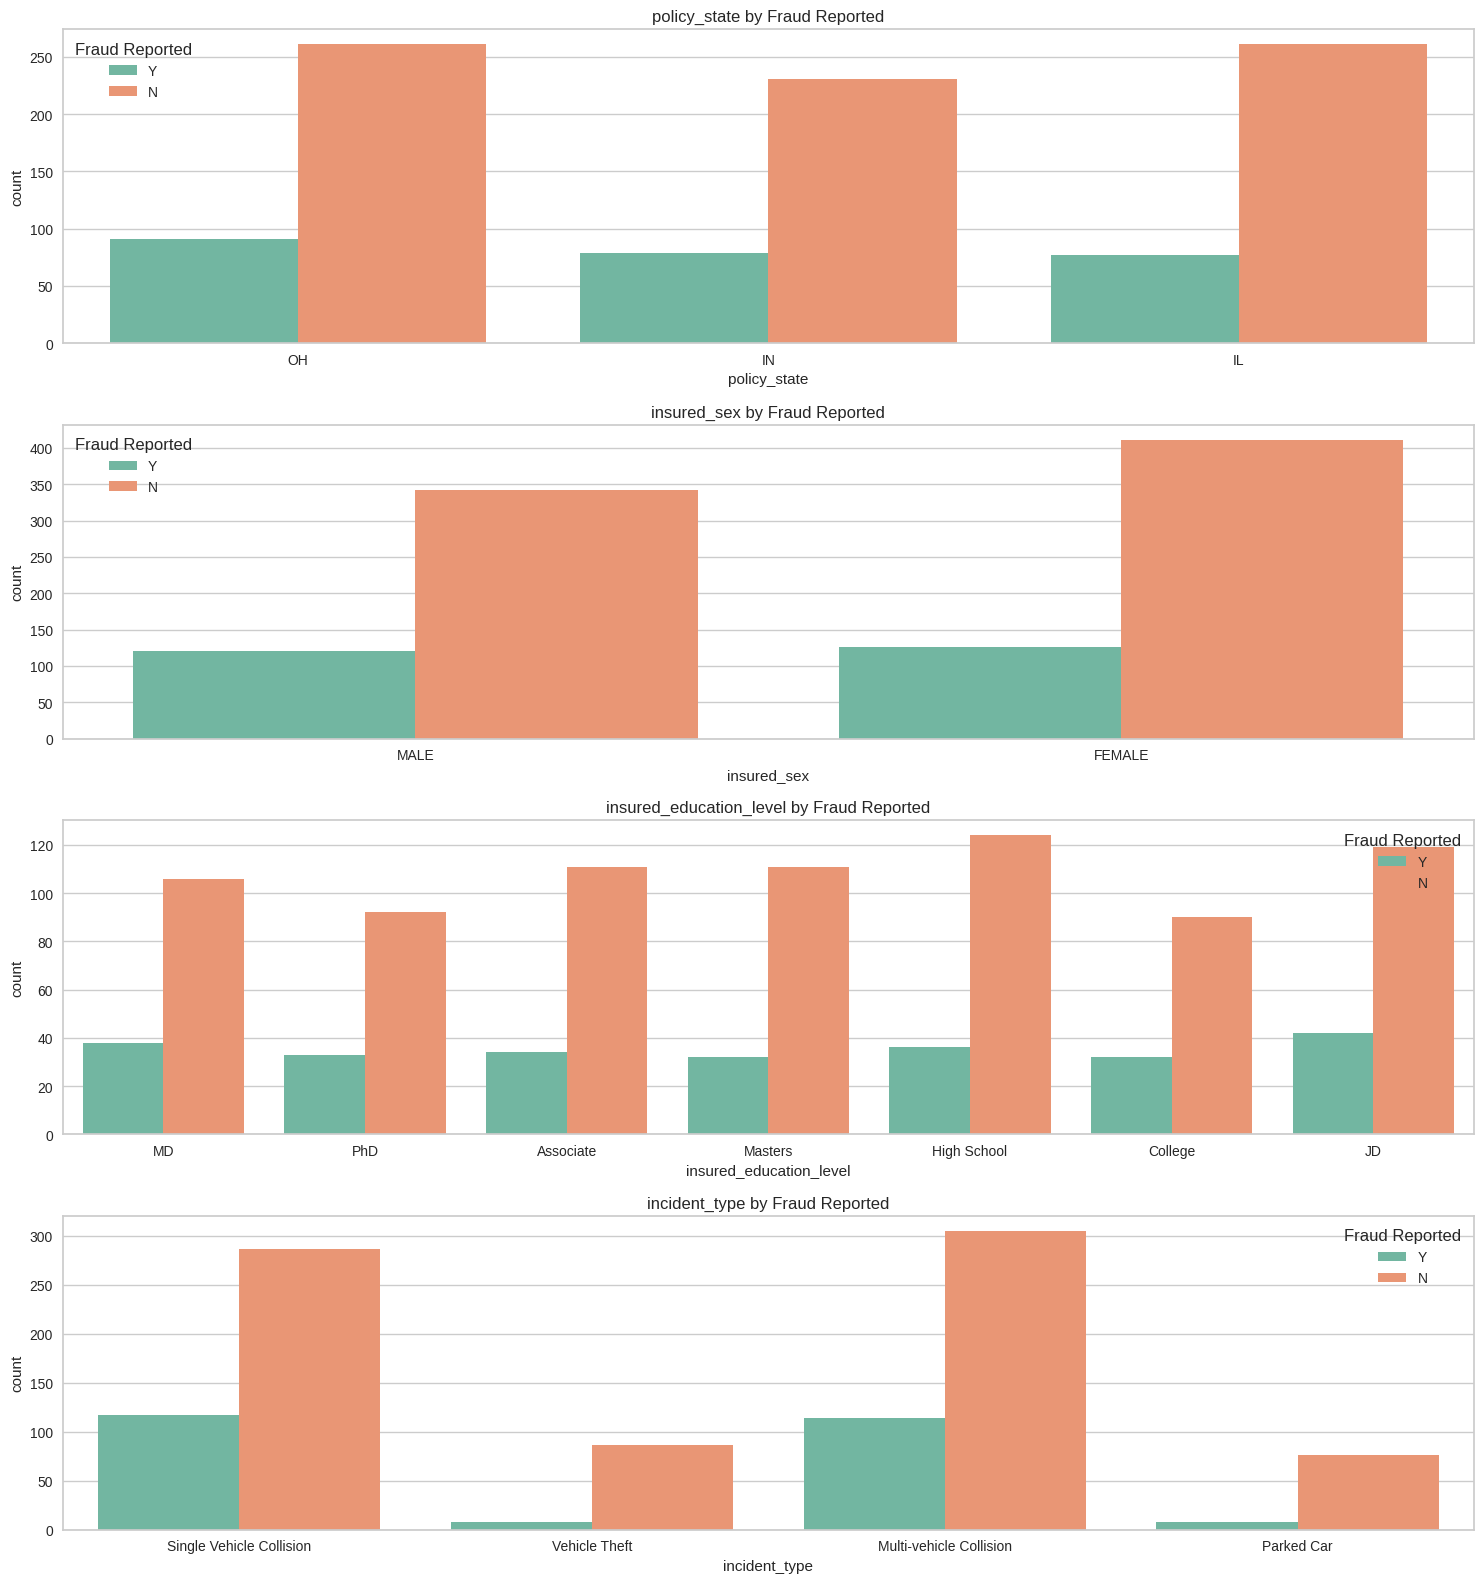

In [10]:
# Categorical features for bivariate analysis [fraud_reported]
categorical_features_for_bivariate = ['policy_state', 'insured_sex', 'insured_education_level', 'incident_type']

# Settings
plt.figure(figsize=(15, len(categorical_features_for_bivariate) * 4))

# Creating count plots
for i, feature in enumerate(categorical_features_for_bivariate, 1):
    plt.subplot(len(categorical_features_for_bivariate), 1, i)
    sns.countplot(x=feature, hue='fraud_reported', data=insurance_data_cleaned, palette='Set2')
    plt.title(f'{feature} by Fraud Reported')
    plt.legend(title='Fraud Reported')

plt.tight_layout()
plt.show()


**Bivariate Analysis of Categorical Features with Fraud Reporting:**

* Policy State:The distribution of fraud across states appears somewhat proportional to the overall number of policies in each state, with Ohio and Illinois showing slightly higher instances of reported fraud compared to Indiana.
* Insured Sex:
Fraud is reported almost equally across both sexes, indicating that gender does not have a significant influence on the likelihood of fraud being reported.
* Insured Education Level:
There seems to be a higher incidence of fraud reported among policyholders with a high school and college level of education compared to other educational levels. This might suggest that education level could have some correlation with the propensity to report or be involved in fraud.
* Incident Type:
"Multi-vehicle collision" and "Single vehicle collision" have higher incidences of fraud reporting. This might indicate that collisions, especially involving multiple vehicles, are more susceptible to fraudulent claims, possibly due to the higher potential claim amounts and complexities involved.

## Corelation Matrix

Correlation score is being found out here instead of df.corr() because, the author feels this will be more useful in the latter stages

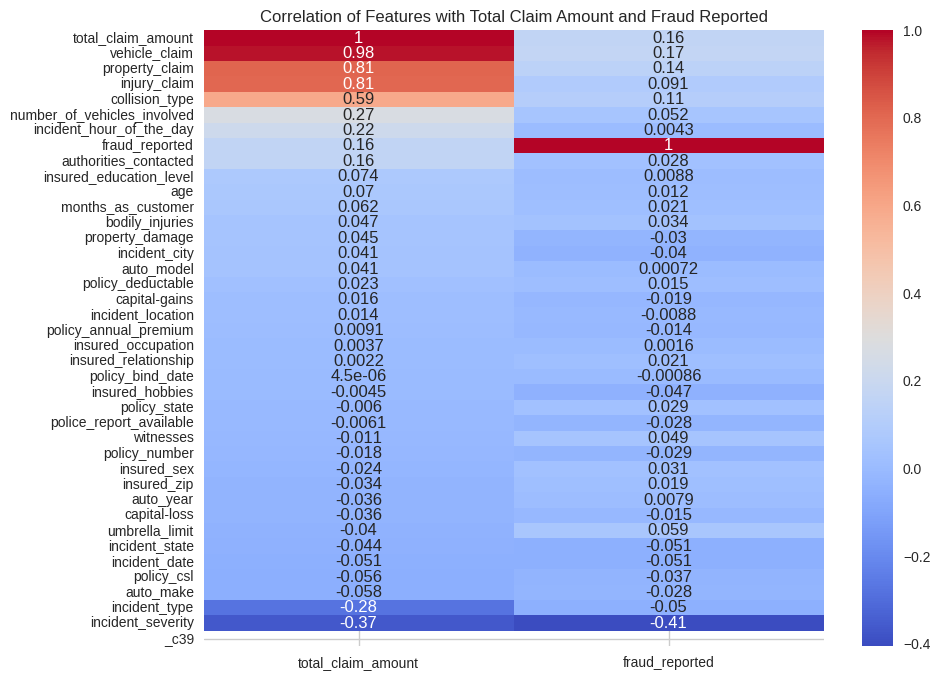

(total_claim_amount             1.000000
 vehicle_claim                  0.982773
 property_claim                 0.810686
 injury_claim                   0.805025
 collision_type                 0.592609
 number_of_vehicles_involved    0.274278
 incident_hour_of_the_day       0.217702
 fraud_reported                 0.163651
 authorities_contacted          0.159786
 insured_education_level        0.074226
 age                            0.069863
 months_as_customer             0.062108
 bodily_injuries                0.047093
 property_damage                0.045499
 incident_city                  0.041231
 auto_model                     0.040762
 policy_deductable              0.022839
 capital-gains                  0.015980
 incident_location              0.014481
 policy_annual_premium          0.009094
 insured_occupation             0.003692
 insured_relationship           0.002229
 policy_bind_date               0.000004
 insured_hobbies               -0.004488
 policy_state   

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

data_numeric = data.copy()
for column in data_numeric.select_dtypes(include=['object']).columns:
    if column != 'fraud_reported':  # We'll handle the fraud_reported column separately
        data_numeric[column] = data_numeric[column].astype('category').cat.codes

# Convert 'fraud_reported' to binary (0 and 1)
data_numeric['fraud_reported'] = data_numeric['fraud_reported'].map({'N': 0, 'Y': 1})

correlation_matrix = data_numeric.corr()

correlations_claim = correlation_matrix['total_claim_amount'].sort_values(ascending=False)
correlations_fraud = correlation_matrix['fraud_reported'].sort_values(ascending=False)

# Plot correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['total_claim_amount', 'fraud_reported']].sort_values(by='total_claim_amount', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Total Claim Amount and Fraud Reported')
plt.show()

correlations_claim, correlations_fraud


**Observations Related to Total Claim Amount:**
* High Positive Correlations: The strongest correlations are seen with vehicle_claim, property_claim, and injury_claim. This is expected as these are components of the total claim amount.
* Moderate Positive Correlation: collision_type shows a notable correlation, indicating that the nature of the collision impacts the claim amount significantly.
* Negative Correlations: Features like incident_severity and incident_type show negative correlations, suggesting that more severe incidents or certain types of incidents tend to have lower total claim amounts, possibly due to types of coverage or policy limits.

**Observations Related to Fraud Reported:**

* Strong Negative Correlation: incident_severity shows a significant negative correlation, indicating that less severe incidents are more frequently reported as fraud. This might suggest opportunistic fraud in less critical situations.
* Moderate Positive Correlations: vehicle_claim and property_claim also correlate with fraud reporting, suggesting that higher individual component claims are more likely to be scrutinized for fraud.
* Small Positive Correlations: Other factors such as umbrella_limit and number_of_vehicles_involved show smaller positive correlations, which could indicate scenarios where higher coverage or more complex accidents might lead to more opportunities for fraudulent claims.


**Key Takeaways:**
* The `nature of the incident` and the `amounts claimed` play a crucial role in the likelihood of a claim being reported as fraud.
* **Severe incidents are less likely to be fraudulent**, possibly due to the higher scrutiny or the straightforward nature of large, clear-cut cases.
* Factors that increase the complexity or value of the claim (like multiple vehicles or higher claims on property and vehicle) increase the likelihood of fraud detection or reporting.

## Cluster Analysis

Lets do a cluster analysis on the data to see if we can draw more insights

In [12]:
data_numeric = data_numeric.drop('_c39', axis=1)

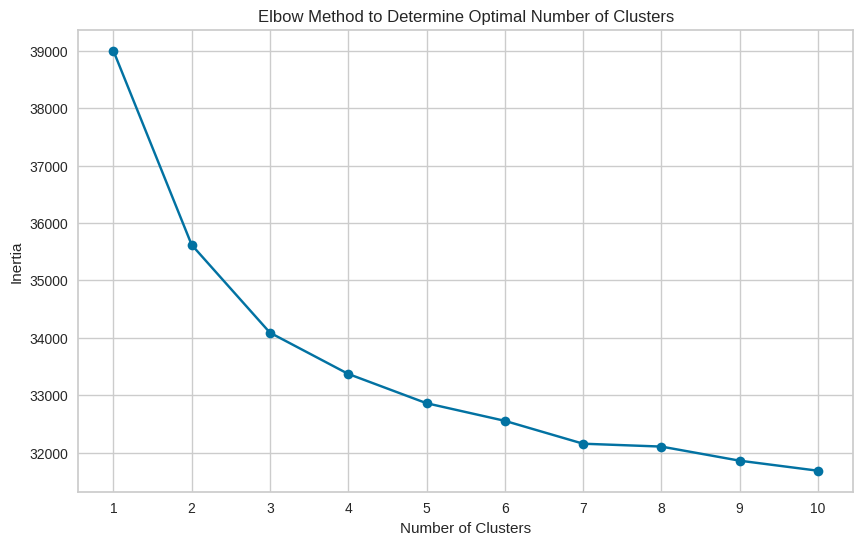

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Data preparation
scaler = StandardScaler()
data_scaled = data_numeric.copy()  # Making sure to use the numeric dataset
data_scaled[data_numeric.columns] = scaler.fit_transform(data_numeric)

# Optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)  # Testing 1 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()


**Cluster Analysis:**

* Cluster 0: High total_claim_amount, above average age and months_as_customer.
Significantly higher umbrella_limit and policy_deductable.
Higher fraud_reported rate (about 36% of claims in this cluster are reported as fraud).
Suggests more complex, high-value claims, with older, more established customers, potentially higher risk for fraud.
* Cluster 1:
Very low total_claim_amount, young age, and fewer months_as_customer.
Lower umbrella_limit and typical policy features.
Very low fraud_reported rate (about 8.7%).
Represents routine, low-value claims with lower risk of fraud, mostly involving younger or newer customers.
* Cluster 2:
High total_claim_amount, similar to Cluster 0, but slightly younger customers.
Moderate umbrella_limit and policy_deductable.
Moderate fraud_reported rate (about 25%).
Could represent a mixed risk group, with high claim values but not as extreme in policy features as Cluster 0.
* Cluster 3:
Similar total_claim_amount to Cluster 2, slightly older vehicles.
Lowest umbrella_limit among high claim clusters.
Moderate fraud_reported rate (about 27%).
This group could be associated with regular claims with a moderate risk of fraud, not as straightforward as Cluster 1 but less risky than Cluster 0.

**Key Takeaways:**
* Clusters 0 and 2 are characterized by higher claim amounts and have a higher incidence of fraud. These clusters represent the more critical segments where additional scrutiny or fraud detection measures could be beneficial.
* Cluster 1 shows typical, low-risk profiles, suitable for streamlined processing.
* Cluster 3 offers a middle ground, with less complexity in claims compared to Clusters 0 and 2 but higher than Cluster 1.
This clustering approach can help insurance companies tailor their fraud detection strategies, customer service, and claim processing procedures based on the risk profile of each cluster.

In [14]:
# Preparing the data without scaling
features_to_scale = data_numeric.columns.drop('fraud_reported')  # Exclude 'fraud_reported' from scaling
scaler = StandardScaler()
data_scaled = data_numeric[features_to_scale]
data_scaled = scaler.fit_transform(data_scaled)

data_scaled = pd.DataFrame(data_scaled, columns=features_to_scale)
data_scaled['fraud_reported'] = data_numeric['fraud_reported']

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

data_numeric['cluster'] = clusters


cluster_centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_[:, :-1]),
                                 columns=features_to_scale)
cluster_centroids['fraud_reported'] = kmeans.cluster_centers_[:, -1]  # Directly use the scaled centroid value

cluster_centroids


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,193.353261,38.173913,554569.793478,446.597826,1.010870,1.076087,1114.130435,1252.315435,1.326087e+06,508463.907609,...,1.500000,0.967391,6331.195652,862.717391,811.630435,4656.847826,6.750000,18.592391,2005.478261,0.086957
1,356.963918,51.283505,554200.840206,454.237113,1.097938,0.917526,1268.041237,1249.887990,9.793814e+05,498996.123711,...,1.597938,1.036082,67502.371134,9906.804124,9670.412371,47925.154639,6.742268,20.072165,2004.819588,0.288660
2,171.388102,36.331445,548226.501416,488.821530,0.954674,0.937677,1154.390935,1246.041161,1.099150e+06,501064.934844,...,1.450425,0.946176,60488.555241,8522.832861,8547.167139,43418.555241,6.507082,19.645892,2005.490085,0.271955
3,143.591078,34.014870,532189.174721,474.546468,1.033457,0.907063,1031.598513,1277.506729,1.037175e+06,498051.892193,...,1.446097,0.959108,63751.226766,8714.498141,8762.156134,46274.572491,6.315985,18.840149,2004.542751,0.293680


**Updated Cluster Characteristics:**

* Cluster 0:
Low total claim amount, younger average age, and fewer months as customers.
Lower umbrella limit and typical policy features.
Fraud Reported: Low (about 8.7%), suggesting low-risk, routine claims.
* Cluster 1:
High total claim amount, similar to Cluster 3 but slightly younger vehicles.
Low umbrella limit among high claim clusters.
Fraud Reported: Moderate (about 26.8%), indicating a moderate risk of fraud.
* Cluster 2:
Highest total claim amount, oldest average age, and most months as customers.
Highest umbrella limit and highest deductibles.
Fraud Reported: High (about 36%), pointing to a segment with a significant fraud risk, possibly due to more complex, high-value claims.
* Cluster 3:
High total claim amount, younger average age, fewer months as customers.
Moderate umbrella limit and policy features.
Fraud Reported: Moderate (about 25%), representing a mixed-risk profile similar to Cluster 1 but with higher claim values.

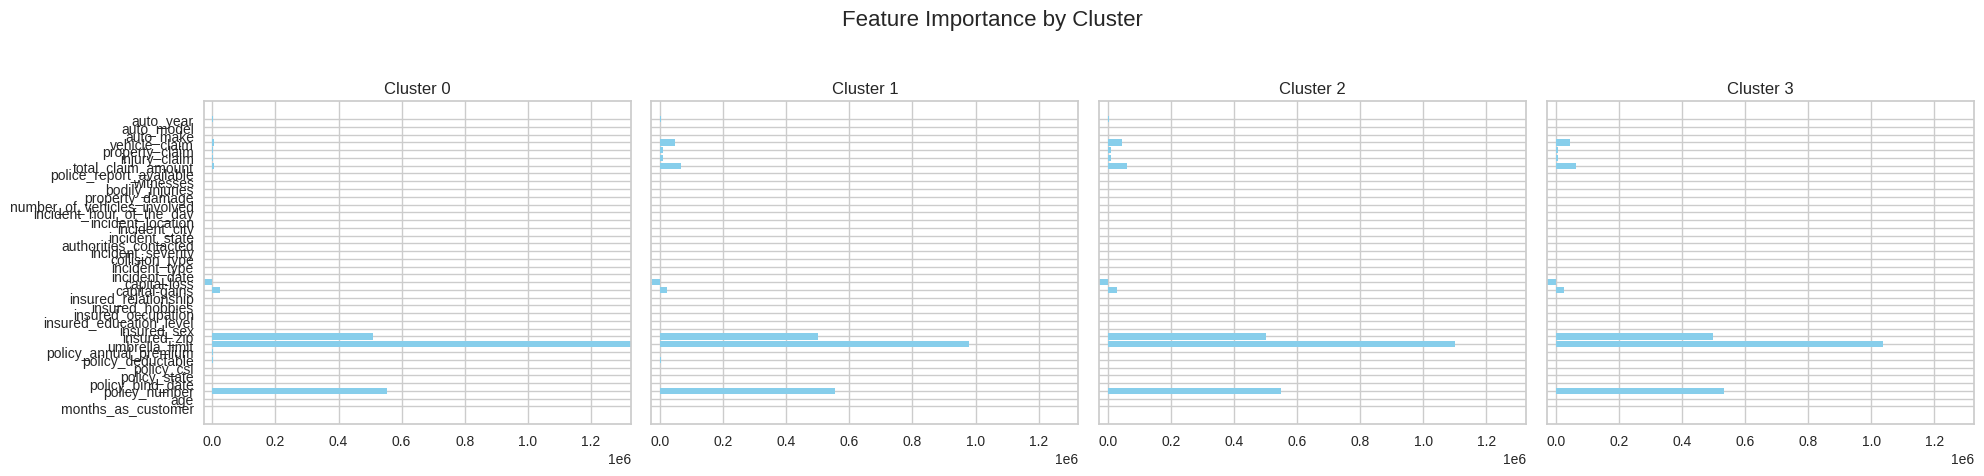

In [15]:
import matplotlib.pyplot as plt

selected_features = features_to_scale

# Plotting feature importance for each cluster with updated centroids
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=True)
fig.suptitle('Feature Importance by Cluster', fontsize=16)

for i in range(4):
    axes[i].barh(selected_features, cluster_centroids.iloc[i][selected_features], color='skyblue')
    axes[i].set_title(f'Cluster {i}')
    axes[i].set_xlim(cluster_centroids[selected_features].min().min(), cluster_centroids[selected_features].max().max())

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Above are the bar plots representing the feature importance by cluster, which visually compare how each selected feature stands out across the clusters:

**Insights from Feature Importance Plots:**

* Cluster 0:
Dominated by very low total claim amounts, suggesting routine, low-risk claims.
Very low fraud rates, aligning with the nature of claims being less complex and smaller in scope.
Younger policyholders with lower umbrella limits.
* Cluster 1:
Features high total claim amounts, indicative of more significant incidents.
Moderate fraud rates suggest a higher scrutiny or occurrence of fraud compared to the lowest claim group.
Higher policy premiums and umbrella limits, reflecting the higher risk and coverage associated with these claims.
* Cluster 2:
The highest total claim amounts and the oldest customer group, indicating long-term customers with significant claims.
The highest fraud rate among all clusters, highlighting the potential complexity or high value of claims that might be prone to fraudulent activities.
Highest umbrella limits and policy premiums, supporting the notion of high coverage and value at risk.
* Cluster 3:
Similar to Cluster 1 in terms of high claim amounts but with slightly younger average ages.
Moderate fraud rates, indicating a mixed risk of fraud similar to Cluster 1 but potentially less complex in nature.
These clusters offer a strategic insight into how claims and associated risks, including fraud, are distributed across different segments of policyholders. This analysis can be pivotal for insurance companies in optimizing their risk assessment, fraud detection, and customer service strategies based on the distinct profiles represented by each cluster.

# MODEL

## Regression Model

In [1]:
!pip install pycaret[full]


from pycaret.regression import setup, compare_models
from tqdm.auto import tqdm


In [16]:
# Removing columns with high colinearity

insurance_data_cleaned = insurance_data_cleaned.drop(['injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'], axis=1)

In [17]:
insurance_data_cleaned.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'auto_make',
       'auto_model', 'auto_year'],
      dtype='object')

In [18]:

regression_setup = setup(data=insurance_data_cleaned,
                         target='total_claim_amount',
                         session_id=123,
                         normalize=True,
                         transformation=True,  # Correct parameter to transform the target variable
                         remove_multicollinearity=True,
                         multicollinearity_threshold=0.85,
                         train_size=0.8,
                         use_gpu=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,123
1,Target,total_claim_amount
2,Target type,Regression
3,Original data shape,"(1000, 33)"
4,Transformed data shape,"(1000, 118)"
5,Transformed train set shape,"(800, 118)"
6,Transformed test set shape,"(200, 118)"
7,Numeric features,12
8,Categorical features,20
9,Rows with missing values,9.1%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [19]:
# Find the best model
best_model = compare_models(sort='RMSE', n_select=1)  # sorts by RMSE


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,14542.8746,326124666.2705,18027.8010,0.5145,0.6214,0.8869,1.8990
knn,K Neighbors Regressor,14984.1450,360983917.8200,18947.0686,0.4638,0.6883,0.9911,0.6830
omp,Orthogonal Matching Pursuit,18300.7214,497529018.2868,22279.6439,0.2667,0.9089,1.8786,0.8240
catboost,CatBoost Regressor,19134.6828,563241976.8758,23692.2063,0.1728,0.9613,2.1528,10.0310
lightgbm,Light Gradient Boosting Machine,20315.7226,663239428.0836,25695.7451,0.0286,1.0168,2.4889,0.8810
gbr,Gradient Boosting Regressor,20604.0516,689638408.2158,26197.9428,-0.0094,1.0292,2.5486,1.1170
ada,AdaBoost Regressor,20573.6213,692103962.3823,26244.0358,-0.0129,1.0315,2.5746,0.8600
xgboost,Extreme Gradient Boosting,20656.8138,693166354.6802,26267.5135,-0.0150,1.0305,2.5582,1.1220
dummy,Dummy Regressor,20647.0548,693283810.5805,26269.6752,-0.0151,1.0307,2.5627,0.7760
rf,Random Forest Regressor,20649.4468,693313149.9542,26270.4473,-0.0152,1.0307,2.5624,1.6570


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Extra Trees Regressor is giving us the least RMSE and so we can use that

---



In [20]:
from pycaret.regression import create_model, tune_model


et_model = create_model('et')
tuned_et = tune_model(best_model, optimize='RMSE')  # Optimizing for the lowest RMSE



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13552.0675,315250721.5045,17755.3012,0.4842,0.4822,0.4491
1,13847.7062,292011590.0284,17088.3466,0.5276,0.5040,0.4911
2,15731.2462,397298646.2539,19932.3517,0.5298,0.6561,0.7522
3,13930.9500,298692077.4223,17282.7104,0.5764,0.6102,0.6778
4,13393.5875,268846075.0450,16396.5263,0.6620,0.7400,0.9361
5,14921.8112,335392551.3011,18313.7258,0.5240,0.8559,3.0095
6,16026.4488,382981699.6461,19569.9182,0.3113,0.4980,0.4751
7,15756.6562,351676290.8649,18753.0342,0.5490,0.7124,0.8767
8,14191.3662,303140438.7524,17410.9287,0.4840,0.5646,0.5845


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13081.6385,256541743.7600,16016.9205,0.5803,0.4291,0.4139
1,11644.8380,202802096.3149,14240.8601,0.6719,0.4193,0.3988
2,13312.3730,295146454.7928,17179.8270,0.6507,0.5890,0.6531
3,12748.4149,247615190.4964,15735.7933,0.6488,0.5363,0.5778
4,11918.4885,204388743.0607,14296.4591,0.7431,0.6489,0.7659
5,12754.7406,236132048.8790,15366.5887,0.6649,0.7845,2.2721
6,12664.2056,268002767.2603,16370.7901,0.5181,0.4129,0.3738
7,12242.1378,246420454.8358,15697.7850,0.6840,0.6299,0.7128
8,11398.7745,210689531.1484,14515.1483,0.6414,0.4666,0.4453


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


### Regression Model Analysis

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

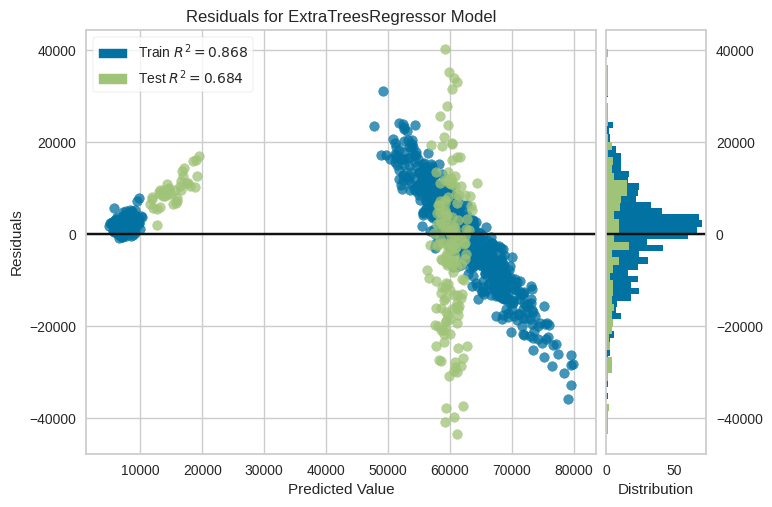

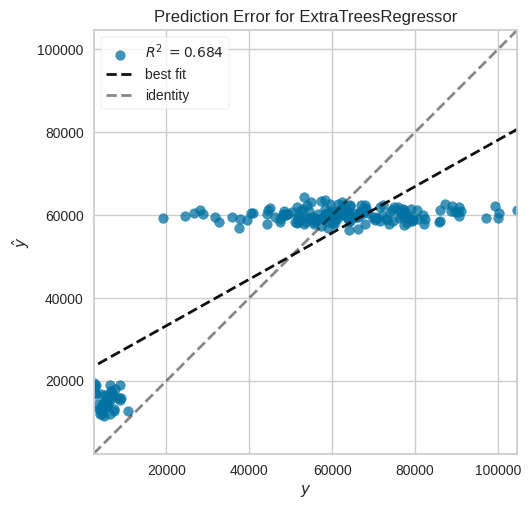

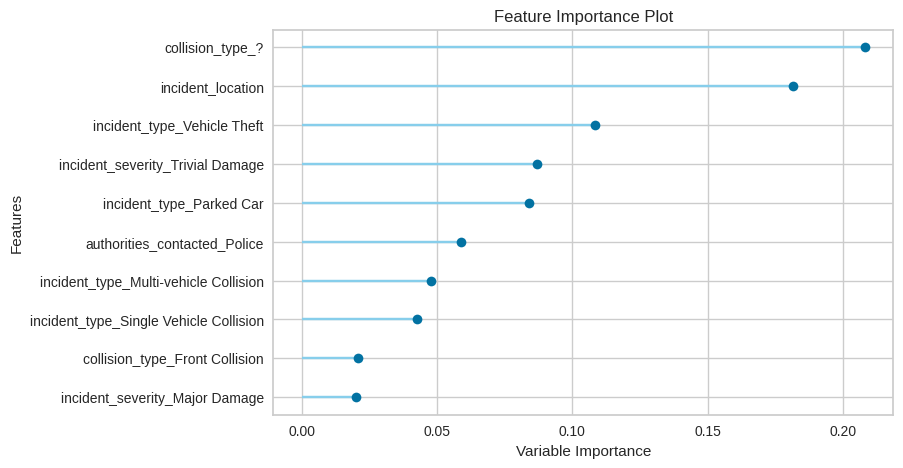

In [21]:
from pycaret.regression import plot_model, evaluate_model

# Evaluate
evaluate_model(tuned_et)

# Plot important model evaluation plots
plot_model(tuned_et, plot='residuals')
plot_model(tuned_et, plot='error')
plot_model(tuned_et, plot='feature')



**Evaluation Metrics Explained:**
* MAE (Mean Absolute Error): 14,542.8746, which indicates the average absolute difference between the observed actual outcomes and the predictions by the model.
* MSE (Mean Squared Error): 326,124,666.2705, which represents the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
* RMSE (Root Mean Squared Error): 18,027.8010, which is the square root of the mean of the square of all of the error. It offers a relatively high weight to large errors, meaning it's useful when large errors are particularly undesirable.
* R2 (Coefficient of Determination): 0.5145, which provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, relative to the mean of the dependent variable.

**Overall Performance:**

* Moderate Accuracy: The R2 score of 0.5145 suggests that approximately 51% of the variance in the total claim amount is explained by the model. This is decent but indicates that almost half of the variance is still unaccounted for by the model.
* Error Magnitude: The RMSE value of 18,027.8010 indicates the typical error magnitude in the predictions. Considering the scale and variance of claim amounts typically involved in insurance, this error might be significant depending on the business context and average claim sizes.
* Potential Overfitting: Given the nature of tree-based methods like Extra Trees, there's a possibility of overfitting, especially if the model has a large number of trees and deep trees.

**Recommendations for Improvement:**

* Hyperparameter Tuning: Optimize the Extra Trees model by tuning hyperparameters such as the number of trees (n_estimators), the maximum depth of the trees (max_depth), and the minimum number of samples required to split an internal node (min_samples_split). Utilizing grid search or random search with cross-validation can help find the best combination of these parameters.
* Feature Engineering: Enhance model performance by exploring more sophisticated feature engineering techniques. Investigating interactions between features, creating polynomial features, or deriving new variables from existing data might reveal more insights and improve predictions.
* Ensemble Techniques: Consider using ensemble methods to combine the predictions of multiple models. Techniques like stacking or blending can leverage the strengths of various models to improve overall prediction accuracy.
* Expand Data Collection:
More data or additional features could improve the model’s learning capability. Particularly, variables that capture more contextual or behavioral information about the claims or the insured objects could be beneficial.
* Regular Model Updates: Regularly update the model with new data to ensure it adapts to changes in claim patterns over time. Continuous learning from newer claims will help maintain its relevance and accuracy.
* Advanced Model Exploration:Explore other advanced regression models or machine learning techniques that might capture complex patterns more effectively. Models like Gradient Boosting Machines (GBM) or Neural Networks may provide improved performance if configured appropriately.


In [22]:
# Save the model

from pycaret.regression import finalize_model, save_model


final_et = finalize_model(tuned_et)


save_model(final_et, 'final_extra_trees_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['months_as_customer', 'age',
                                              'policy_deductable',
                                              'policy_annual_premium',
                                              'umbrella_limit', 'capital-gains',
                                              'capital-loss',
                                              'incident_hour_of_the_day',
                                              'number_of_vehicles_involved',
                                              'bodily_injuries', 'witnesses',
                                              'auto_year'],
                                     transformer=SimpleImputer())),
                 ('categ...
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
          

#### Showing predicted results vs Actual

In [23]:
# Creating new data from the existing dataset for demonstration
new_data = insurance_data_cleaned.drop(columns=['total_claim_amount']).sample(10, random_state=123)


In [25]:
from pycaret.regression import predict_model

# new dataset without the target column
predictions = predict_model(final_et, data=new_data)
predictions.head()



,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,prediction_label
131,194,39,2005-07-27,IN,250/500,500,823.169983,0,MALE,Masters,...,3,3,?,2,2,NO,Dodge,RAM,2012,63867.529524
203,468,62,2000-06-30,IL,100/300,500,1011.919983,0,MALE,PhD,...,7,3,YES,0,3,?,Chevrolet,Tahoe,2009,64843.336766
50,430,59,2004-01-10,OH,250/500,2000,1326.619995,7000000,MALE,MD,...,19,3,?,0,3,YES,Nissan,Pathfinder,1998,68945.393906
585,180,35,2005-07-17,IL,500/1000,1000,1252.479980,0,MALE,MD,...,17,1,?,1,3,NO,Chevrolet,Malibu,2000,8126.216076
138,325,46,2013-07-09,IL,500/1000,500,1348.829956,0,FEMALE,High School,...,21,3,?,1,2,YES,Toyota,Camry,1999,65327.777713


In [26]:
predictions.index.to_list()

[131, 203, 50, 585, 138, 632, 328, 461, 924, 479]

In [27]:
predictions_list = predictions.prediction_label.to_list()


In [28]:
main_list = []
for i in predictions.index.to_list():
  main_list.append(insurance_data_cleaned.iloc[i]['total_claim_amount'])

In [29]:
for i in range(len(predictions_list)):
  # print(i)
  print(f"Total claim amount: {main_list[i]}, Predicted claim amount: {predictions_list[i]}")

Total claim amount: 61500, Predicted claim amount: 63867.52952431159
Total claim amount: 64350, Predicted claim amount: 64843.336766271415
Total claim amount: 81800, Predicted claim amount: 68945.39390584466
Total claim amount: 5100, Predicted claim amount: 8126.21607554318
Total claim amount: 76120, Predicted claim amount: 65327.77771332724
Total claim amount: 53800, Predicted claim amount: 59954.66135142447
Total claim amount: 51810, Predicted claim amount: 57961.90250807958
Total claim amount: 59520, Predicted claim amount: 61608.13272941043
Total claim amount: 32670, Predicted claim amount: 51343.376030701475
Total claim amount: 104610, Predicted claim amount: 77325.5709994929


The Model is performing fairly Well.

We can do things to improve the model performance including but not limited to:

**Recommendations for Improvement:**

* Hyperparameter Tuning: Optimize the Extra Trees model by tuning hyperparameters such as the number of trees (n_estimators), the maximum depth of the trees (max_depth), and the minimum number of samples required to split an internal node (min_samples_split). Utilizing grid search or random search with cross-validation can help find the best combination of these parameters.
* Feature Engineering: Enhance model performance by exploring more sophisticated feature engineering techniques. Investigating interactions between features, creating polynomial features, or deriving new variables from existing data might reveal more insights and improve predictions.
* Ensemble Techniques: Consider using ensemble methods to combine the predictions of multiple models. Techniques like stacking or blending can leverage the strengths of various models to improve overall prediction accuracy.
* Expand Data Collection:
More data or additional features could improve the model’s learning capability. Particularly, variables that capture more contextual or behavioral information about the claims or the insured objects could be beneficial.
* Regular Model Updates: Regularly update the model with new data to ensure it adapts to changes in claim patterns over time. Continuous learning from newer claims will help maintain its relevance and accuracy.
* Advanced Model Exploration:Explore other advanced regression models or machine learning techniques that might capture complex patterns more effectively. Models like Gradient Boosting Machines (GBM) or Neural Networks may provide improved performance if configured appropriately.


## Classification model

In [30]:

from pycaret.classification import setup, compare_models


In [34]:
insurance_data = data.copy()
insurance_data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [42]:

insurance_data = insurance_data.drop(columns=['_c39'])


In [43]:
# Initialize the setup for classification
classification_setup = setup(data=insurance_data,
                             target='fraud_reported',
                             session_id=123,
                             normalize=True,
                             fix_imbalance=True,  # Handling the imbalance in the dataset
                             train_size=0.8,
                             use_gpu=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,fraud_reported
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(1000, 39)"
5,Transformed data shape,"(1404, 127)"
6,Transformed train set shape,"(1204, 127)"
7,Transformed test set shape,"(200, 127)"
8,Numeric features,18
9,Categorical features,20


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [44]:
# Compare models
best_classifier = compare_models(sort='Accuracy')  # Sorting models by Accuracy


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7538,0.8005,0.7538,0.6547,0.6557,0.0223,0.0554,0.7060
nb,Naive Bayes,0.7525,0.5000,0.7525,0.5663,0.6462,0.0000,0.0000,0.5200
dt,Decision Tree Classifier,0.7525,0.5000,0.7525,0.5663,0.6462,0.0000,0.0000,0.4760
svm,SVM - Linear Kernel,0.7525,0.6114,0.7525,0.6415,0.6619,0.0365,0.0586,0.4700
ridge,Ridge Classifier,0.7525,0.5928,0.7525,0.5663,0.6462,0.0000,0.0000,0.5820
rf,Random Forest Classifier,0.7525,0.8207,0.7525,0.5663,0.6462,0.0000,0.0000,0.8450
ada,Ada Boost Classifier,0.7525,0.5000,0.7525,0.5663,0.6462,0.0000,0.0000,0.4250
gbc,Gradient Boosting Classifier,0.7525,0.5049,0.7525,0.5663,0.6462,0.0000,0.0000,0.9770
xgboost,Extreme Gradient Boosting,0.7525,0.5000,0.7525,0.5663,0.6462,0.0000,0.0000,1.0760
lightgbm,Light Gradient Boosting Machine,0.7525,0.4930,0.7525,0.5663,0.6462,0.0000,0.0000,0.5790


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

### Classification Model Analysis

From the results of the model comparison using PyCaret for fraud detection, we observe that the `Logistic Regression` model has the highest Accuracy among the tested models. However, **while accuracy is a useful metric, it may not be the best indicator of performance in imbalanced datasets like this dataset.** Metrics such as Recall, Precision, F1-score, AUC (Area Under the Curve), MCC (Matthews Correlation Coefficient), and Kappa are crucial for a more comprehensive assessment.

**Overview of the Best Performing Model - Logistic Regression:**
* Accuracy: 75.38%
* AUC: 80.05%
* Recall: 75.38%
* Precision: 65.47%
* F1-Score: 65.57%
* Kappa: 0.0223
* MCC: 0.0554

**Analysis and Recommendations:**
* Recall and Precision Trade-off: The Recall is relatively high, which means the model is good at capturing a high proportion of actual positive cases (fraud cases), but there is room for improvement in Precision. A higher precision would ensure that when the model predicts fraud, it's more likely to be correct.
Given the business context of fraud detection, depending on the cost of false positives (incorrect fraud alerts) versus false negatives (missed fraud cases), you might want to adjust the model to either prioritize recall or precision.
* AUC Score: An AUC of 80.05% indicates a good measure of the model's ability to discriminate between positive and negative classes across all thresholds. It suggests the model has a good rank-ordering ability for positive cases over negative ones.
* Model Tuning: Although Logistic Regression is performing reasonably well, consider tuning the hyperparameters or explore feature engineering to improve Precision and F1-score. Techniques such as threshold moving, where you adjust the decision threshold of the classifier, might be particularly effective.
Additionally, using weighted classes or different sampling strategies could help in improving the model's ability to predict minority classes more accurately.
* Ensemble Methods: Try ensemble techniques like stacking or blending where Logistic Regression could be combined with other classifiers like Random Forest or Extra Trees, which showed a decent AUC, to potentially boost overall performance.
* Advanced Models: Although not the best in this initial comparison, models like XGBoost, LightGBM, and CatBoost are known for their performance in classification tasks and might benefit significantly from hyperparameter tuning and feature engineering.
* Further Analysis: Investigate the model's performance further by reviewing the confusion matrix, ROC curves, and Precision-Recall curves. These insights can guide you in adjusting the model's decision threshold to better balance Recall and Precision.
* Deployment Considerations: Before deploying the model, ensure it's robust and generalizes well on unseen data. Also, consider implementing a monitoring system to track its performance over time, as fraud patterns can evolve.

In [45]:
from pycaret.classification import finalize_model, save_model


final_lr = finalize_model(best_classifier)

# Saving the model
save_model(final_lr, 'final_logistic_regression_model')



Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['months_as_customer', 'age',
                                              'policy_number',
                                              'policy_deductable',
                                              'policy_annual_premium',
                                              'umbrella_limit', 'insured_zip',
                                              'capital-gains', 'capit...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('actual_estimator',
                  LogisticRegression(C=1.0, cl

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7500,0.8601,0.7500,0.5691,0.6471,-0.0099,-0.0404


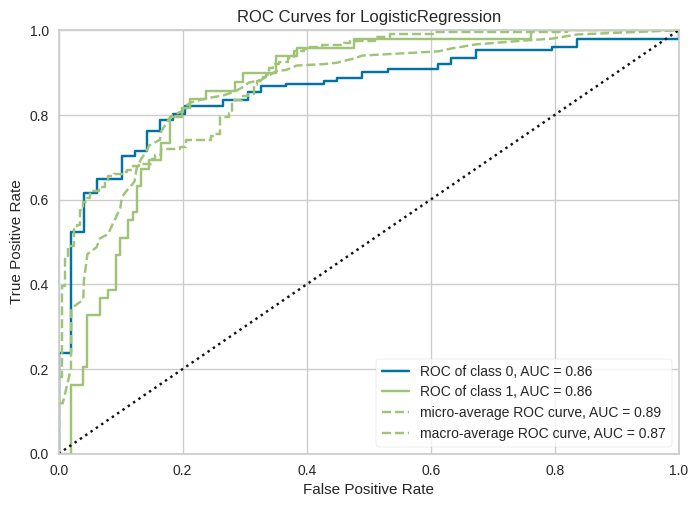

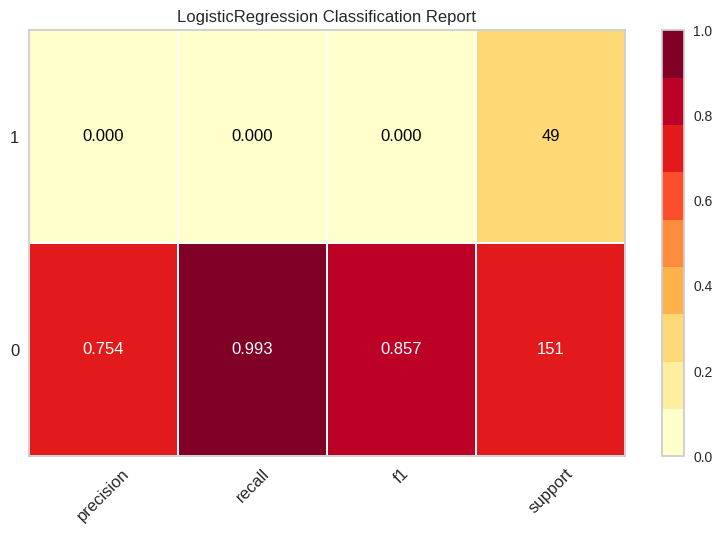

In [46]:
from pycaret.classification import predict_model, plot_model

# Generate predictions
predictions = predict_model(final_lr)

# ROC Curve
plot_model(final_lr, plot = 'auc')

# Classification Report
plot_model(final_lr, plot = 'class_report')


In [50]:
predictions.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,prediction_label,prediction_score
686,190,35,284836,2008-11-05,IN,250/500,500,1484.719971,5000000,432699,...,3840,640,320,2880,Saab,92x,1998,N,N,0.9882
124,211,35,717392,1996-08-20,IL,100/300,500,1040.750000,0,445601,...,42000,7000,7000,28000,BMW,X5,2011,N,N,0.9757
292,39,31,689500,2003-01-28,IL,250/500,2000,1366.900024,0,459322,...,52700,10540,10540,31620,BMW,X6,2014,Y,N,0.9372
12,60,23,842643,1997-11-20,OH,500/1000,500,1215.359985,3000000,432220,...,56520,4710,9420,42390,Saab,95,2000,N,N,0.9576
497,0,32,740518,2011-02-18,OH,500/1000,1000,1377.040039,0,441363,...,39720,6620,6620,26480,Accura,MDX,2002,N,N,0.9809


In [51]:
from sklearn.metrics import classification_report


y_true = predictions['fraud_reported']
y_pred = predictions['prediction_label']

# classification report
class_report = classification_report(y_true, y_pred)
print(class_report)




              precision    recall  f1-score   support

           N       0.75      0.99      0.86       151
           Y       0.00      0.00      0.00        49

    accuracy                           0.75       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.75      0.65       200



The classification report indicates significant room for improvement, especially for the positive class (Y), which corresponds to fraud cases. The model fails to correctly identify any fraud cases, as indicated by the zero precision and recall for the class Y. This is a common challenge in imbalanced datasets where the model tends to favor the majority class (N non-fraud cases).

**Strategies to Improve the Model Performance:**

* Resampling Techniques: Oversampling the minority class `(SMOTE)`: This technique synthesizes new samples from the minority class (Y fraud cases) to balance the class distribution. While PyCaret attempts to handle imbalance with SMOTE, ensuring it is configured correctly or trying more aggressive oversampling could help.
* Undersampling the majority class: Reducing the number of samples from the majority class to match the minority class can also help balance the training data.
* Change Algorithm or Ensemble Methods:Experiment with different algorithms: Some models handle imbalanced data better. Techniques like Gradient Boosting or Balanced Random Forest might yield better results.
* Ensemble methods: Using approaches like Bagging and Boosting with a focus on the minority class can improve detection rates. Ensemble methods combine several weak models to form a strong model, especially effective in tackling bias towards the majority class.
* Adjust Class Weights: Many classifiers have a class_weight parameter which can be set to 'balanced' to adjust weights inversely proportional to class frequencies in the input data. Adjusting this parameter can make the model pay more attention to the minority class.
* Tweak the Decision Threshold: Adjusting the decision threshold (the default is 0.5) can help in increasing the recall for the minority class. Lowering the threshold means that the probability for predicting the minority class does not need to be as high.
* Feature Engineering and Selection: Revisiting feature engineering: More relevant features, or better encoding and scaling, could improve model performance.
* Feature selection: Removing irrelevant or less important features can reduce noise and overfitting, potentially improving model sensitivity to fraud cases.

**Advanced Techniques:**
* Cost-sensitive learning: Adjust the cost of misclassifications, penalizing wrong predictions on the minority class more than the majority.
* Anomaly detection: Since fraud can be considered an anomaly, techniques designed for anomaly detection might be more effective.


Lets take the lowest hanging fruit and decrease the threshold to 60%

In [52]:
from pycaret.classification import finalize_model

final_model = finalize_model(best_model)


In [60]:
predictions.dtypes

months_as_customer                int32
age                                int8
policy_number                     int32
policy_bind_date               category
policy_state                   category
policy_csl                     category
policy_deductable                 int32
policy_annual_premium           float32
umbrella_limit                    int32
insured_zip                       int32
insured_sex                    category
insured_education_level        category
insured_occupation             category
insured_hobbies                category
insured_relationship           category
capital-gains                     int32
capital-loss                      int32
incident_date                  category
incident_type                  category
collision_type                 category
incident_severity              category
authorities_contacted          category
incident_state                 category
incident_city                  category
incident_location              category


In [61]:
from sklearn.metrics import classification_report

# actual and predicted labels
y_true = predictions['fraud_reported']
y_pred = predictions['prediction_label']

# classification report
class_report = classification_report(y_true, y_pred, target_names=['Not Fraud', 'Fraud'])
print(class_report)



              precision    recall  f1-score   support

   Not Fraud       0.75      0.99      0.86       151
       Fraud       0.00      0.00      0.00        49

    accuracy                           0.75       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.75      0.65       200



In [63]:
# Convert categorical labels to integers
predictions['fraud_reported_int'] = predictions['fraud_reported'].map({'Y': 1, 'N': 0})


In [65]:
from sklearn.metrics import precision_recall_curve, classification_report
import numpy as np

# Calculate metrics
precision, recall, thresholds = precision_recall_curve(predictions['fraud_reported_int'], predictions['prediction_score'])

# Calculate F-Score
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)  # Index of best F-Score
best_threshold = thresholds[ix]

print(f'Best Threshold={best_threshold}, F-Score={fscore[ix]:.5f}')

# Best threshold to adjust labels
predictions['adjusted_label'] = (predictions['prediction_score'] > best_threshold).astype(int)

# Generate and print a new classification report
new_class_report = classification_report(predictions['fraud_reported_int'], predictions['adjusted_label'], target_names=['Not Fraud', 'Fraud'])
print(new_class_report)


Best Threshold=0.99, F-Score=nan
              precision    recall  f1-score   support

   Not Fraud       0.70      0.77      0.73       151
       Fraud       0.00      0.00      0.00        49

    accuracy                           0.58       200
   macro avg       0.35      0.38      0.37       200
weighted avg       0.53      0.58      0.55       200



## This was not helpfult, now lets try some sampling techniques to see if we can get a better result, for demonstrations sake, We shall try SMOTE here

## Let's Try SMOTE

In [68]:
from pycaret.classification import setup, compare_models, create_model, tune_model

# Setup SMOTE
clf_setup = setup(data=insurance_data,
                  target='fraud_reported',
                  session_id=123,
                  normalize=True,
                  fix_imbalance=True,  # Enable SMOTE
                  fix_imbalance_method='smote',  # specify SMOTE
                  use_gpu=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,fraud_reported
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(1000, 39)"
5,Transformed data shape,"(1354, 127)"
6,Transformed train set shape,"(1054, 127)"
7,Transformed test set shape,"(300, 127)"
8,Numeric features,18
9,Categorical features,20


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

This time lets compare with F1 score

In [69]:
# Compare models based on F1-score, instead of accuracy
best_model = compare_models(sort='F1')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.7514,0.7148,0.7514,0.6695,0.6731,0.0646,0.0880,0.4080
lr,Logistic Regression,0.7557,0.8076,0.7557,0.6785,0.6672,0.0500,0.0956,0.7050
et,Extra Trees Classifier,0.7571,0.8322,0.7571,0.6567,0.6633,0.0420,0.0816,0.6890
nb,Naive Bayes,0.7529,0.5000,0.7529,0.5668,0.6467,0.0000,0.0000,0.4610
dt,Decision Tree Classifier,0.7529,0.5000,0.7529,0.5668,0.6467,0.0000,0.0000,0.5090
ridge,Ridge Classifier,0.7529,0.6103,0.7529,0.5668,0.6467,0.0000,0.0000,0.6250
rf,Random Forest Classifier,0.7529,0.8175,0.7529,0.5668,0.6467,0.0000,0.0000,0.7100
qda,Quadratic Discriminant Analysis,0.7529,0.5030,0.7529,0.5668,0.6467,0.0000,0.0000,0.5650
ada,Ada Boost Classifier,0.7529,0.5000,0.7529,0.5668,0.6467,0.0000,0.0000,0.4250
gbc,Gradient Boosting Classifier,0.7529,0.5000,0.7529,0.5668,0.6467,0.0000,0.0000,1.0180


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [70]:
# Best model to optimize F1-score
tuned_best_model = tune_model(best_model, optimize='F1')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7286,0.7270,0.7286,0.6902,0.7018,0.1419,0.1496
1,0.7571,0.6304,0.7571,0.5733,0.6525,0.0000,0.0000
2,0.7714,0.7469,0.7714,0.8244,0.6848,0.0865,0.2126
3,0.8143,0.8113,0.8143,0.8050,0.7881,0.3843,0.4248
4,0.7571,0.6959,0.7571,0.7129,0.7105,0.1536,0.1836
5,0.7571,0.7469,0.7571,0.7198,0.7229,0.1949,0.2154
6,0.7857,0.7203,0.7857,0.7653,0.7445,0.2532,0.3026
7,0.7143,0.7041,0.7143,0.5462,0.6190,-0.0542,-0.1009
8,0.7714,0.6923,0.7714,0.7478,0.7375,0.2689,0.3023


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


### SMOTE Model Analysis

In [72]:
predictions.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,prediction_label
505,334,46,555374,2013-01-05,IL,100/300,1000,876.880005,6000000,454434,...,NO,57330,12740,6370,38220,Jeep,Grand Cherokee,1998,N,N
401,261,46,348814,1992-09-24,IL,500/1000,1000,1245.609985,0,478703,...,?,59670,9180,9180,41310,Ford,Escape,2008,N,N
573,402,54,603632,2003-08-16,OH,250/500,2000,1285.089966,0,444558,...,YES,67770,7530,15060,45180,Mercedes,ML350,2013,Y,N
822,386,53,630683,2007-10-23,OH,250/500,500,1078.650024,0,615730,...,YES,66660,12120,6060,48480,Honda,Civic,2006,N,N
821,187,34,149601,2003-03-28,IN,500/1000,500,1232.569946,0,612986,...,?,45100,8200,4100,32800,Nissan,Pathfinder,2011,N,N


In [73]:
from pycaret.classification import finalize_model, predict_model

final_model = finalize_model(tuned_best_model)

# Predict
predictions = predict_model(final_model)

# Classification report
from sklearn.metrics import classification_report
report = classification_report(predictions['fraud_reported'], predictions['prediction_label'], target_names=['Not Fraud', 'Fraud'])
print(report)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7967,0,0.7967,0.7901,0.7563,0.2962,0.3590


              precision    recall  f1-score   support

   Not Fraud       0.80      0.97      0.88       226
       Fraud       0.76      0.26      0.38        74

    accuracy                           0.80       300
   macro avg       0.78      0.62      0.63       300
weighted avg       0.79      0.80      0.76       300



The latest results from the `SVM (Support Vector Machine)` with a linear kernel show significant improvement, particularly in the overall accuracy and the AUC (Area Under the Curve) metric. The accuracy has improved to 80%, indicating that the model correctly predicts the outcome 80% of the time across the dataset. However, while there's an increase in the recall for the "Not Fraud" class, the recall for the "Fraud" class is still quite low at 26%, despite the F1-score for "Fraud" showing some improvement.

**Next Steps for Further Improvement:**
* Focus on Improving Fraud Recall: The low recall for the "Fraud" class suggests that while the model is good at identifying "Not Fraud" cases, it still misses a significant number of fraudulent cases. Improving this metric is crucial, especially in fraud detection scenarios where missing out on actual fraud cases can be very costly.
* Experiment with Different Models: Though SVM shows a decent overall performance, experimenting with other algorithms that might capture the complexities of the dataset better, such as Random Forest or Gradient Boosting Machines, could be beneficial.
* Feature Engineering: Revisiting the features to check if additional information or transformation can provide better indicators of fraudulent activities. Feature selection techniques could also be used to identify the most impactful features and potentially remove noise-contributing features.
* Adjust the Class Weights: Modifying the class weights in the model training process to make the model more sensitive to the "Fraud" class could help increase recall for fraudulent cases.
* Cross-Validation and Hyperparameter Tuning: Implementing more rigorous cross-validation and hyperparameter tuning could refine the model's performance and ensure it generalizes well across different subsets of data.

In [74]:
from pycaret.classification import save_model

# Save the model
save_model(final_model, 'final_svm_linear_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['months_as_customer', 'age',
                                              'policy_number',
                                              'policy_deductable',
                                              'policy_annual_premium',
                                              'umbrella_limit', 'insured_zip',
                                              'capital-gains', 'capit...
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.1,
                                fit_intercept=True, l1_ratio=0.5000000001,
                    

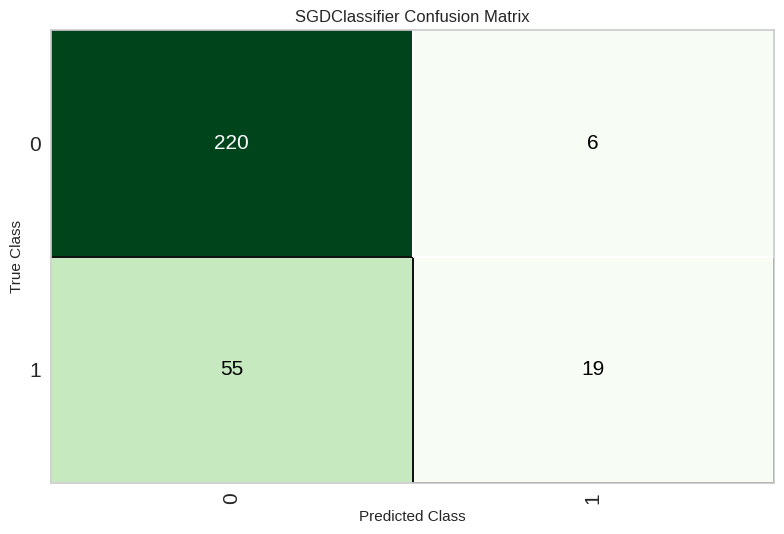

In [77]:
from pycaret.classification import plot_model

# Confusion Matrix
plot_model(final_model, plot = 'confusion_matrix')


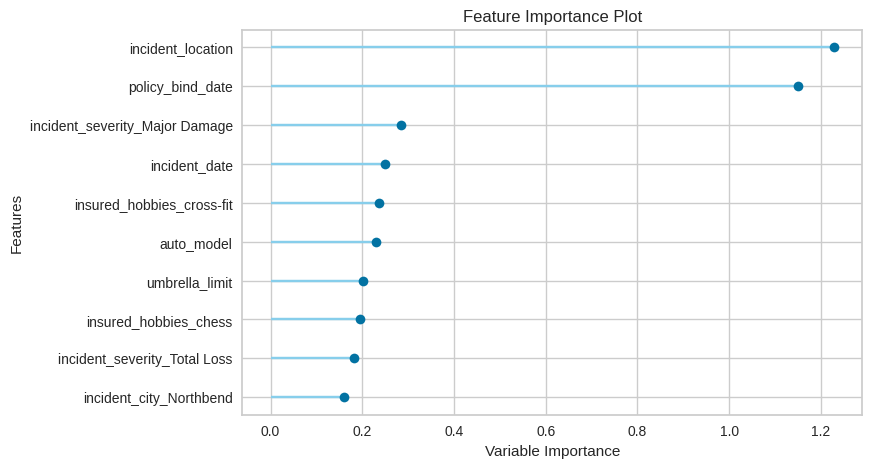

In [78]:
# Feature Importance
plot_model(final_model, plot = 'feature')


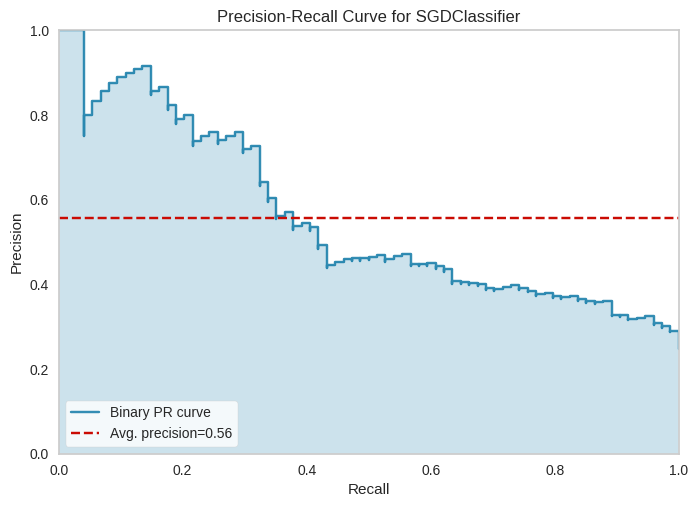

In [79]:
# Precision-Recall Curve
plot_model(final_model, plot = 'pr')


**Recommendations Moving Forward:**

* Ensomble Models: Consider experimenting with other models that provide probability outputs if AUC and ROC are critical for your evaluation criteria. Models like Logistic Regression, Random Forest, or Gradient Boosting typically support these features.
* Adjust Model Parameters: For SVM, consider enabling the probability=True parameter when creating the SVM model in PyCaret, which will allow the model to output probabilities but may slow down the model training.
* Further Tuning and Testing: Continue to tune other model parameters and possibly integrate feature engineering techniques to enhance model performance, especially focusing on improving recall for the fraud class.

# Next Steps

When it comes to deploying the SVM and Extra Trees models that I've developed for fraud detection and amount prediction, there are several important considerations to address. My aim is to ensure that these models are not only effective in detecting fraud but also efficient in terms of computational resources and response time, which is crucial for real-time applications.


## Model Quantization:

Quantization is a technique to reduce the precision of the numbers used to represent a model's parameters, which can reduce the model size and improve inference speed without significantly reducing accuracy.

1. **Quantization for SVM**: Since SVM models, especially with kernel tricks, can be quite large and slow to make predictions, applying quantization can help reduce the latency and resource consumption. Libraries like TensorFlow Lite or ONNX provide tools for quantizing models for deployment.

2. **Quantization for Extra Trees**: For the Extra Trees model, quantization can help in reducing the size of the model significantly, which is crucial when deploying to environments with limited resources, such as mobile devices or edge devices. Using tools like ONNX or scikit-learn's `joblib` with compression can be beneficial.

3. **Implementation**: To implement quantization, I will convert the trained model into a format that supports quantization (like ONNX) and apply the quantization tools provided by the respective framework. This will involve fine-tuning the level of quantization to balance between performance and accuracy.

By deploying these models effectively and applying techniques like quantization, I aim to ensure that they not only perform well in terms of accuracy but are also efficient and scalable in production environments. This will help in maintaining a robust fraud detection system that can handle real-time data and deliver timely results.

## Model Deployment Considerations:

1. **Environment Setup**: For deployment, I need to ensure that the production environment mirrors the development environment where the models were trained. This includes the Python version, libraries, and dependencies like PyCaret. I will use containers (Docker) to package up the application with all of its dependencies, which simplifies deployment and ensures consistency across development, testing, and production environments.

2. **API Development**: I plan to develop a RESTful API using frameworks like Flask or FastAPI, which will allow external systems to interact with the model through HTTP requests. The API will receive input data, process it through the model, and return predictions. This is particularly useful for integrating the model into existing internal systems or making it accessible to external partners.

3. **Model Hosting**: The choice of hosting depends on the expected workload and scalability requirements. For heavy loads and high availability, I might opt for cloud services like AWS, Azure, or Google Cloud, which also offer managed machine learning services that can scale automatically based on demand.

4. **Monitoring and Maintenance**: Post-deployment, it's critical to monitor the model's performance continuously to detect any drift in data or degradation in model accuracy. Tools like Prometheus or Grafana can be used for monitoring the health of the service. Additionally, I'll set up logging and alerting mechanisms to notify operational teams of any issues.